In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
import cv2
import os 
import numpy as np


In [39]:
img = image.load_img("dataset/train/A/0.jpg")

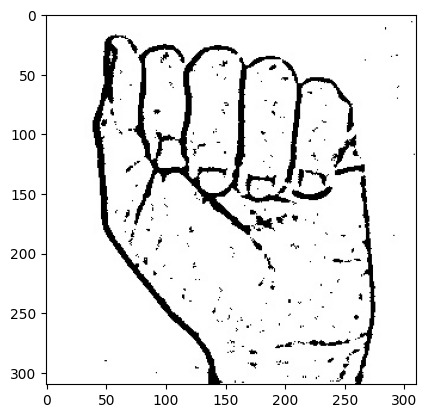

In [40]:
plt.imshow(img)

In [41]:
cv2.imread("dataset/train/A/0.jpg").shape

(310, 310, 3)

In [42]:
sz = 128
classifier = Sequential()

In [43]:
# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#Third Convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [44]:
classifier.add(Flatten())

In [45]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))

In [46]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

In [47]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)       

In [48]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

Found 15219 images belonging to 27 classes.


In [49]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 6825 images belonging to 27 classes.


In [52]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=5,
        validation_data=test_set,
        validation_steps=len(test_set))# No of images in test set

Epoch 1/5


C:\Users\joshi\AppData\Local\Temp\ipykernel_11628\2289585022.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


1522/1522 [==============================] - 498s 327ms/step - loss: 1.9418 - accuracy: 0.3905 - val_loss: 0.4797 - val_accuracy: 0.8403
Epoch 2/5
1522/1522 [==============================] - 262s 172ms/step - loss: 0.7250 - accuracy: 0.7546 - val_loss: 0.1842 - val_accuracy: 0.9503
Epoch 3/5
1522/1522 [==============================] - 136s 90ms/step - loss: 0.4748 - accuracy: 0.8390 - val_loss: 0.1058 - val_accuracy: 0.9779
Epoch 4/5
1522/1522 [==============================] - 251s 165ms/step - loss: 0.3568 - accuracy: 0.8843 - val_loss: 0.0585 - val_accuracy: 0.9827
Epoch 5/5
1522/1522 [==============================] - 136s 89ms/step - loss: 0.2915 - accuracy: 0.9079 - val_loss: 0.0505 - val_accuracy: 0.9873


In [53]:

# Saving the model
model_json = classifier.to_json()
with open("models/model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('models/model-bw.h5')
print('Weights saved')


Model Saved
Weights saved


(None, 128, 128, 1)
1/1 [==============================] - 0s 131ms/step


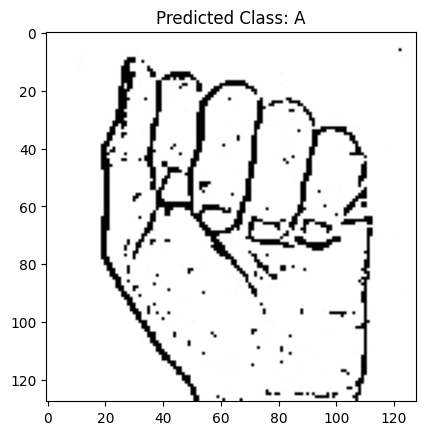

In [55]:
import os
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the saved model architecture from JSON file
model_path = "models/model-bw.json"
with open(model_path, 'r') as json_file:
    loaded_model_json = json_file.read()

# Create the model from the loaded JSON
loaded_model = model_from_json(loaded_model_json)

# Load weights into the model
loaded_model.load_weights("models/model-bw.h5")
print(loaded_model.input_shape)

# Compile the model (important step)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load class names from label.txt
label_path = "models/label.txt"
with open(label_path, "r") as label_file:
    class_names = label_file.read().splitlines()

# Path to the image you want to predict
image_path = "dataset/test/A/108.jpg"  # Replace with the actual path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(sz, sz), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index]

# Display the image and label
plt.imshow(img, cmap="gray")  # Use cmap="gray" for grayscale images
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()



683/683 [==============================] - 15s 21ms/step


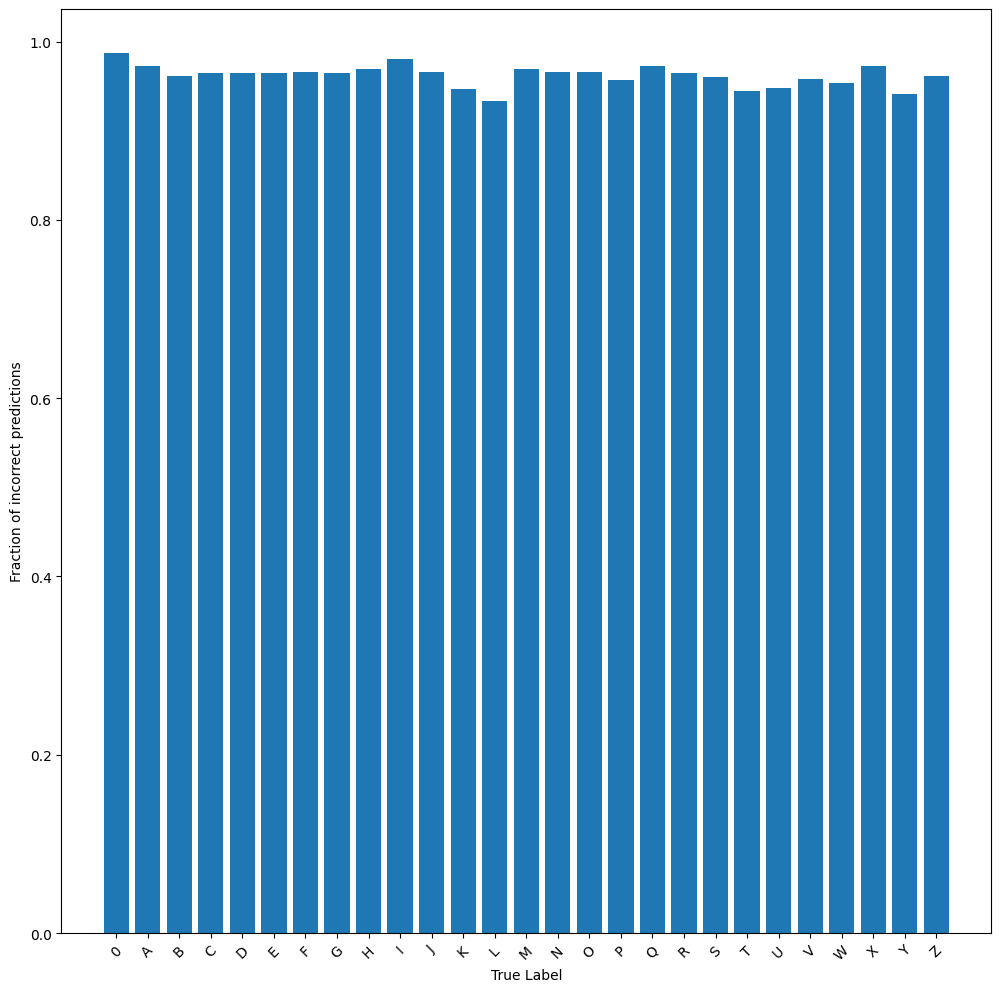

In [57]:
# # Load true labels from the test dataset
# y_true = test_set.classes

# # Generate predictions on the test dataset
# predictions = loaded_model.predict(test_set)
# y_pred = np.argmax(predictions, axis=1)

# # Create confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# num_classes = 27  # Change this to the correct number of classes
# # Plot fractional incorrect misclassifications
# incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
# fig, ax = plt.subplots(figsize=(12, 12))
# plt.bar(np.arange(num_classes), incorr_fraction)
# plt.xlabel('True Label')
# plt.ylabel('Fraction of incorrect predictions')
# plt.xticks(np.arange(num_classes), class_names[:num_classes], rotation=45)
# plt.show()

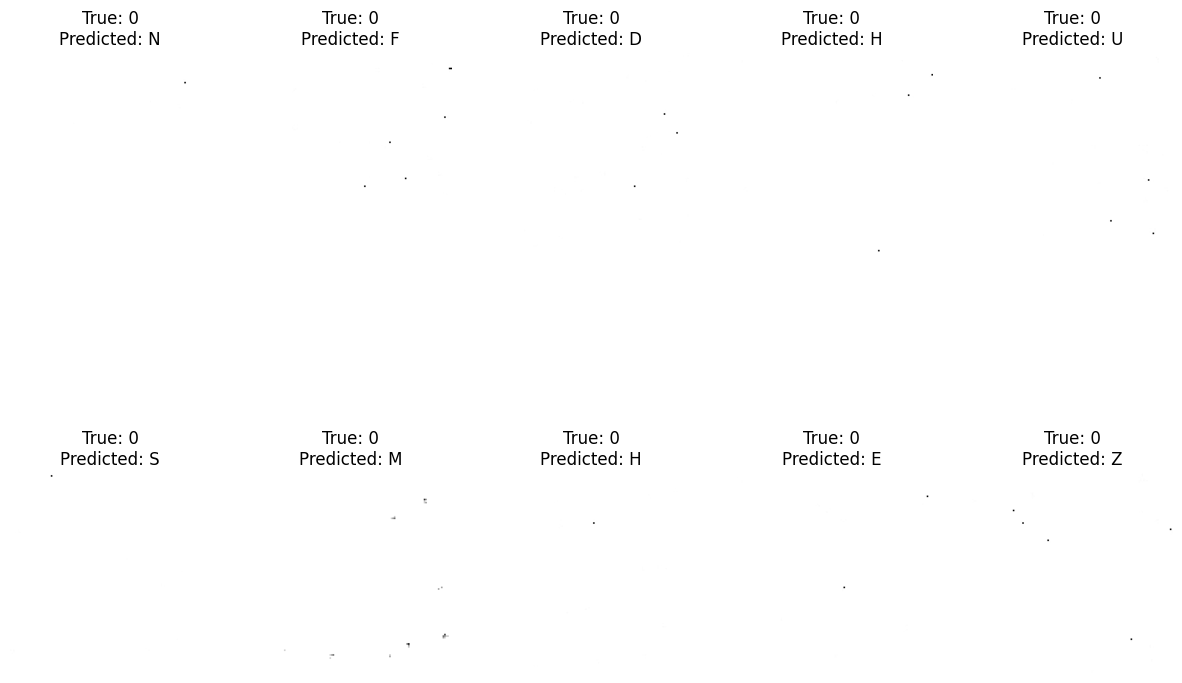

In [ ]:
# misclassified_indices = np.where(y_true != y_pred)[0]

# # Display some misclassified images
# plt.figure(figsize=(15, 10))
# for i, index in enumerate(misclassified_indices[:10]):
#     img_path = test_set.filepaths[index]
#     true_class = class_names[y_true[index]]
#     predicted_class = class_names[y_pred[index]]

#     img = image.load_img(img_path, target_size=(sz, sz), color_mode="grayscale")
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(img, cmap="gray")
#     plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
#     plt.axis('off')

# plt.show()

In [ ]:
import os
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load images and labels
def load_data(dataset_path, class_names):
    data = []
    labels = []
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = image.load_img(img_path, target_size=(sz, sz), color_mode="grayscale")
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0
            data.append(img_array)
            labels.append(i)
    return np.vstack(data), np.array(labels)

# Set the path to your dataset
dataset_path = "dataset/test"  # Replace with the actual path

# Load class names from label.txt
label_path = "models/label.txt"
with open(label_path, "r") as label_file:
    class_names = label_file.read().splitlines()

# Load the saved model architecture from JSON file
model_path = "models/model-bw.json"
with open(model_path, 'r') as json_file:
    loaded_model_json = json_file.read()

# Create the model from the loaded JSON
loaded_model = model_from_json(loaded_model_json)

# Load weights into the model
loaded_model.load_weights("models/model-bw.h5")
print(loaded_model.input_shape)

# Compile the model (important step)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load test data
X_test, y_test = load_data(dataset_path, class_names)

# Make predictions
predictions = loaded_model.predict(X_test)

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_class_indices)

# Display confusion matrix as a heatmap
plt.figure(figsize=(len(class_names), len(class_names)))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
